In [178]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [179]:
df = pd.read_csv('Cleaned_Data5.csv')

C:\Users\batka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [180]:
df.dtypes

Unnamed: 0       int64
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
TotalPrice     float64
year             int64
month            int64
day              int64
week             int64
weekday          int64
dayofyear        int64
dtype: object

In [181]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,year,month,day,week,weekday,dayofyear
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60,2011,12,9,49,4,343
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60,2011,1,18,3,1,18
2,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21,12901.0,United Kingdom,1008.00,2011,10,27,43,3,300
3,206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72,13135.0,United Kingdom,3096.00,2011,5,27,21,4,147
4,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom,3202.92,2011,2,22,8,1,53


In [182]:
df.rename(columns={'TotalPrice' : 'TotalSales'}, inplace = True)

In [183]:
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,year,month,day,week,weekday,dayofyear
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60,2011,12,9,49,4,343
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60,2011,1,18,3,1,18
2,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21,12901.0,United Kingdom,1008.00,2011,10,27,43,3,300
3,206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72,13135.0,United Kingdom,3096.00,2011,5,27,21,4,147
4,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom,3202.92,2011,2,22,8,1,53


In [184]:
df1 = df

In [185]:
df1.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,year,month,day,week,weekday,dayofyear
0,540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.60,2011,12,9,49,4,343
1,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.60,2011,1,18,3,1,18
2,421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21,12901.0,United Kingdom,1008.00,2011,10,27,43,3,300
3,206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72,13135.0,United Kingdom,3096.00,2011,5,27,21,4,147
4,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82,18087.0,United Kingdom,3202.92,2011,2,22,8,1,53


In [186]:
# result = seasonal_decompose(df1['TotalSales'],model ='multiplicative')


In [242]:
df2 = df1.groupby(['CustomerID'])['InvoiceNo'].count().reset_index().sort_values('InvoiceNo', ascending =False)
df2.head()

,CustomerID,InvoiceNo
4041,17841.0,7812
1894,14911.0,5896
1299,14096.0,5128
330,12748.0,4458
1673,14606.0,2759


In [244]:
df3 = df1.groupby(['CustomerID'])['TotalSales'].sum().reset_index().sort_values('TotalSales', ascending =False)
df3.head()

,CustomerID,TotalSales
1702,14646.0,279489.02
4232,18102.0,256438.49
3757,17450.0,187322.17
1894,14911.0,132458.73
55,12415.0,123725.45


In [247]:
merged = pd.merge(df2, df3, on = 'CustomerID', how = 'inner')
merged.head()

,CustomerID,InvoiceNo,TotalSales
0,17841.0,7812,39869.05
1,14911.0,5896,132458.73
2,14096.0,5128,57120.91
3,12748.0,4458,28405.56
4,14606.0,2759,11633.35


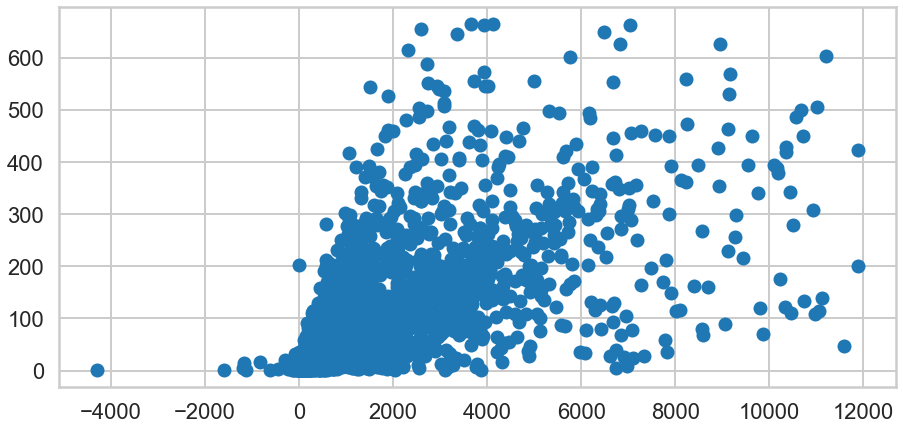

In [307]:
plt.scatter(merged['TotalSales'],merged['InvoiceNo'])

In [313]:
#merged.boxplot()

In [258]:
Q1 = merged.TotalSales.quantile(0.05)
Q3 = merged.TotalSales.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.TotalSales>= Q1-1.5*IQR)&(merged.TotalSales<=Q3+1.5*IQR)]

In [260]:
Q1 = merged.InvoiceNo.quantile(0.05)
Q3 = merged.InvoiceNo.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.InvoiceNo>= Q1-1.5*IQR)&(merged.InvoiceNo<=Q3+1.5*IQR)]

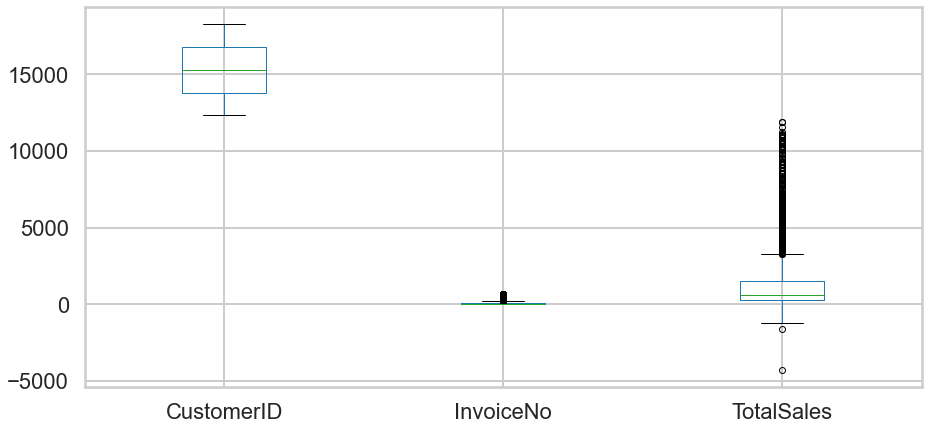

In [261]:
merged.boxplot()

In [262]:
merged.head()

,CustomerID,InvoiceNo,TotalSales
40,17920.0,665,4119.50
41,16904.0,665,3653.75
42,15529.0,664,3935.15
43,16729.0,664,7041.69
44,16241.0,655,2590.31


In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_scaled =scaler.fit_transform(merged)
merged_scaled.shape

(4276, 3)

In [266]:
kmeans = KMeans(n_clusters=4, max_iter = 50)
kmeans.fit(merged_scaled)

KMeans(max_iter=50, n_clusters=4)

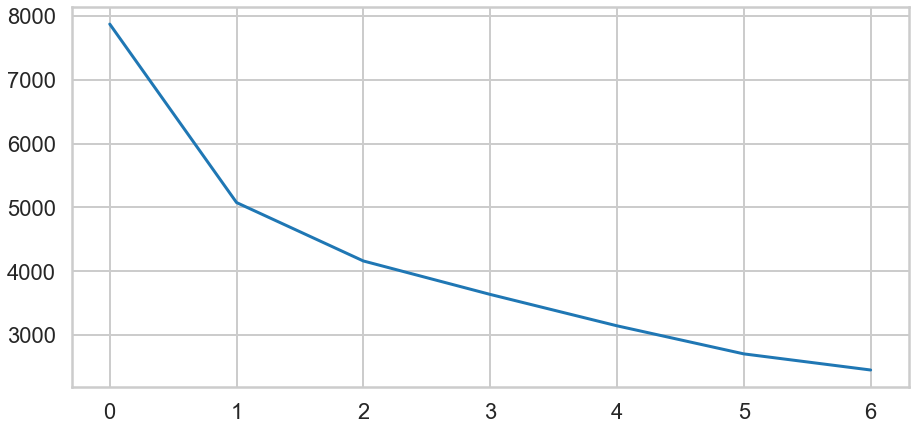

In [268]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(merged_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [270]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(merged_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(merged_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5367719209376661
For n_clusters=3, the silhouette score is 0.41552895779410737
For n_clusters=4, the silhouette score is 0.41906624654605973
For n_clusters=5, the silhouette score is 0.4146110514880741
For n_clusters=6, the silhouette score is 0.34319625797981995
For n_clusters=7, the silhouette score is 0.3637016839063577
For n_clusters=8, the silhouette score is 0.3669755915161371


In [271]:
kmeans= KMeans(n_clusters =4, max_iter =50)
kmeans.fit(merged_scaled)
kmeans.labels_

array([2, 2, 2, ..., 0, 1, 1])

In [272]:
merged['clusterN'] = kmeans.labels_
merged.head()

,CustomerID,InvoiceNo,TotalSales,clusterN
40,17920.0,665,4119.50,2
41,16904.0,665,3653.75,2
42,15529.0,664,3935.15,2
43,16729.0,664,7041.69,2
44,16241.0,655,2590.31,2


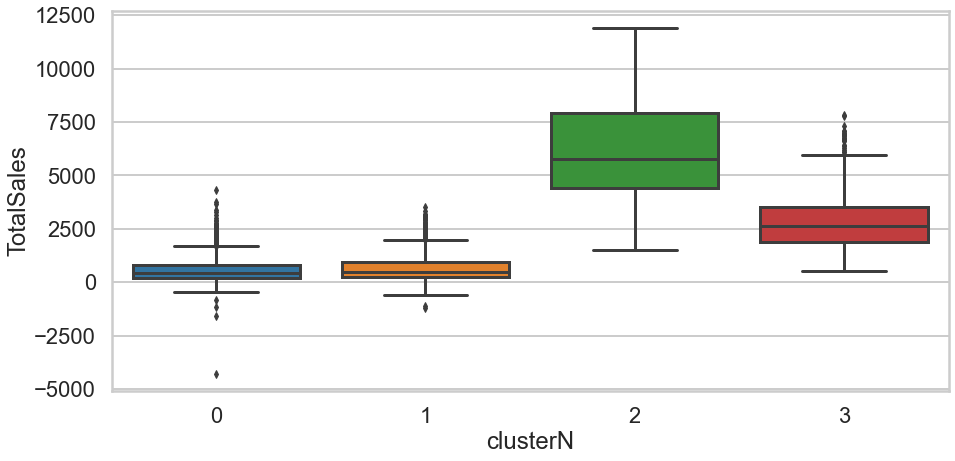

In [273]:
sns.boxplot(x='clusterN', y='TotalSales', data=merged)

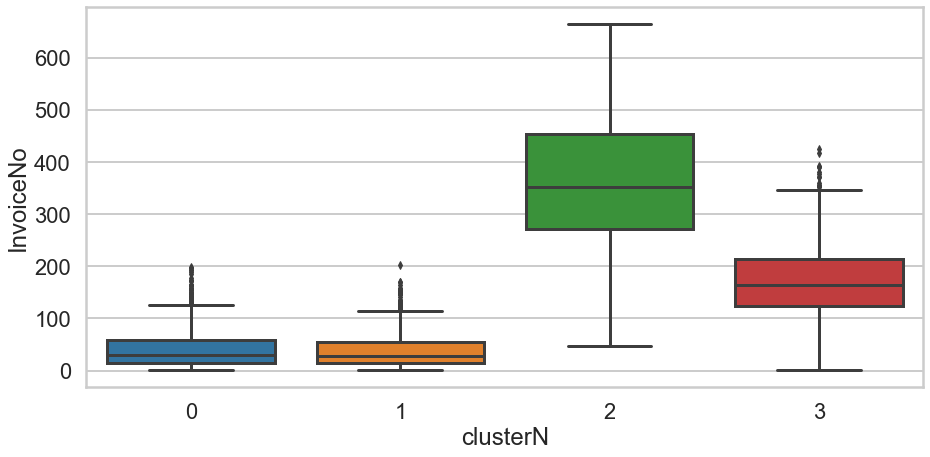

In [274]:
sns.boxplot(x='clusterN', y='InvoiceNo', data=merged)

In [189]:
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'].astype(str))
df1.dtypes

Unnamed: 0              int64
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalSales            float64
year                    int64
month                   int64
day                     int64
week                    int64
weekday                 int64
dayofyear               int64
dtype: object

In [190]:
dfo = df1.select_dtypes(include = ['object'], exclude = ['datetime'])
dfo.head()
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn

,VarName,LevelsCount
0,InvoiceNo,25594
1,StockCode,3684
2,Description,3885
3,Country,37


In [191]:
dfn = df1.drop(vn.VarName, axis = 1)
dfn.head()

,Unnamed: 0,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,year,month,day,week,weekday,dayofyear
0,540421,80995,2011-12-09,2.08,16446.0,168469.60,2011,12,9,49,4,343
1,61619,74215,2011-01-18,1.04,12346.0,77183.60,2011,1,18,3,1,18
2,421632,4800,2011-10-27,0.21,12901.0,1008.00,2011,10,27,43,3,300
3,206121,4300,2011-05-27,0.72,13135.0,3096.00,2011,5,27,21,4,147
4,97432,3906,2011-02-22,0.82,18087.0,3202.92,2011,2,22,8,1,53


In [ ]:
#dummy_features = pd.get_dummies(df1, columns = ['InvoiceNo'])
#dummy_features

In [312]:
# df1 = pd.concat([dfn, dummy_features], axis =1)

#pivoted = df2.pivot_table(index = 'CustomerID', columns = 'InvoiceNo', values = 'month', fill_value = 0)
#pivoted.head()

In [311]:
#plt.scatter(df2['CustomerID'],df2['InvoiceNo'])

In [232]:
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(df2[['CustomerID', 'InvoiceNo']])
y_pred

array([1, 1, 1, ..., 2, 2, 2])

In [233]:
df2['cluster'] = y_pred
df2.head()

,CustomerID,InvoiceNo,cluster
0,12346.0,2,1
1,12347.0,182,1
2,12348.0,31,1
3,12349.0,73,1
4,12350.0,17,1


In [309]:
#df3 = df2[df2.cluster==0]
#df4 = df2[df2.cluster==1]
#df5 = df2[df2.cluster==2]
#df6 = df2[df2.cluster==3]
#plt.scatter(df3.CustomerID,df3.InvoiceNo, color = 'green')
#plt.scatter(df4.CustomerID,df4.InvoiceNo, color ='red')
#plt.scatter(df5.CustomerID,df5.InvoiceNo, color ='blue')
#plt.scatter(df6.CustomerID,df6.InvoiceNo, color = 'yellow')

#plt.xlabel('Customers')
#plt.ylabel('Frequency')

In [310]:
#kmeans.cluster_centers_

Text(0, 0.5, 'Sum of Squares')

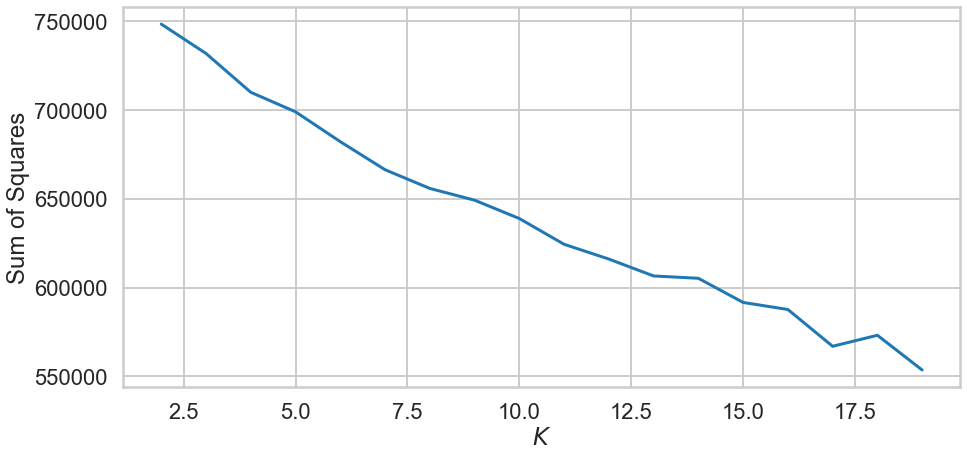

In [216]:
import sklearn.cluster
import numpy as np


ss = []


assignments = {}


X = pivoted.to_numpy()


Krange  = list(range(2, 20))

 
for K in Krange:
    # Make a variable called model, and assign it the result of calling sklearn.cluster.KMeans, with n_clusters = K 
    model = sklearn.cluster.KMeans(n_clusters=K)
    assigned_cluster = model.fit_predict(X)
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[assigned_cluster]) ** 2))
    assignments[str(K)] = assigned_cluster
    

plt.plot(Krange, ss)

 
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")

10


([<matplotlib.axis.XTick at 0x27f8659ac70>,
 <a list of 10 Text major ticklabel objects>)

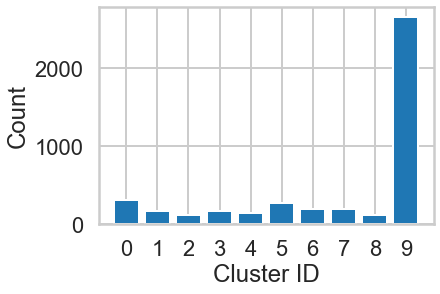

In [195]:
# What is the best K? Fill in the assignment below appropriately
best_K = 10
assignments_best_K = assignments[str(best_K)]
counts = np.bincount(assignments_best_K)
print(len(counts))

# Call bar() on plt, with parameters range(best_K), counts, and align = 'center'
plt.bar(range(best_K), counts, align = 'center')

# Label the axes 
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.xticks(range(best_K))

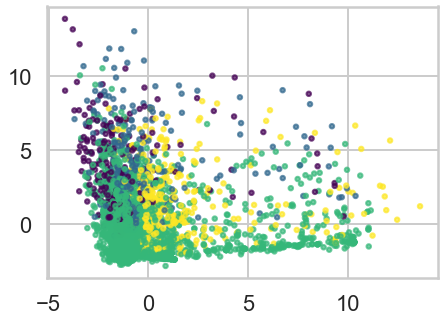

In [218]:
from sklearn.decomposition import PCA
import matplotlib.colors

# Make a variable called pca. We want n_clusters = 3 as parameter to sklearn.cluster.KMeans 
pca = sklearn.cluster.KMeans(n_clusters=4)
# Call a fit_predict() on X 
assigned_cluster_pca = pca.fit_predict(X)
centers = pca.cluster_centers_


# We're going to do some PCA here. Call decomposition.PCA on sklearn, and pass n_components=2 as parameter
pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(X))

#Drop scatter plot and centers 
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(pc1, pc2, alpha=0.7, c=assigned_cluster_pca.tolist(), cmap='viridis', s=20)

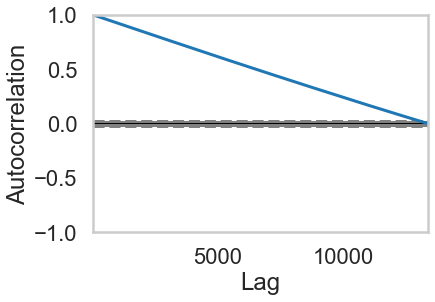

In [197]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df2)
pyplot.show()

In [288]:
df5 = df1.groupby('InvoiceDate').agg({'InvoiceNo':'count', 'TotalSales':'sum'})
df5.head(13)

,InvoiceNo,TotalSales
InvoiceDate,,
2010-12-01,1924,45867.26
2010-12-02,2003,45656.47
2010-12-03,1100,22553.38
2010-12-05,2618,30970.28
2010-12-06,1926,30258.77
2010-12-07,1117,53061.64
2010-12-08,1982,37894.06
2010-12-09,1812,37139.86
2010-12-10,1418,31903.45


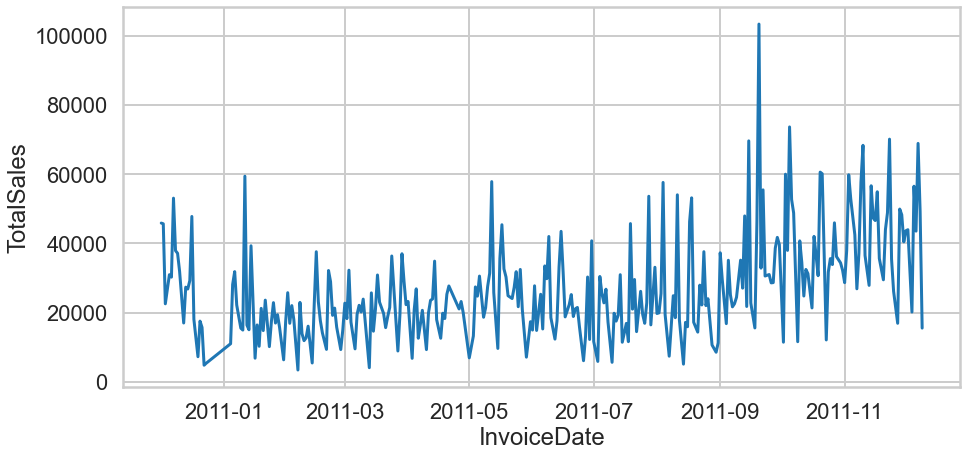

In [289]:
sns.lineplot(x='InvoiceDate', y='TotalSales', data = df5)

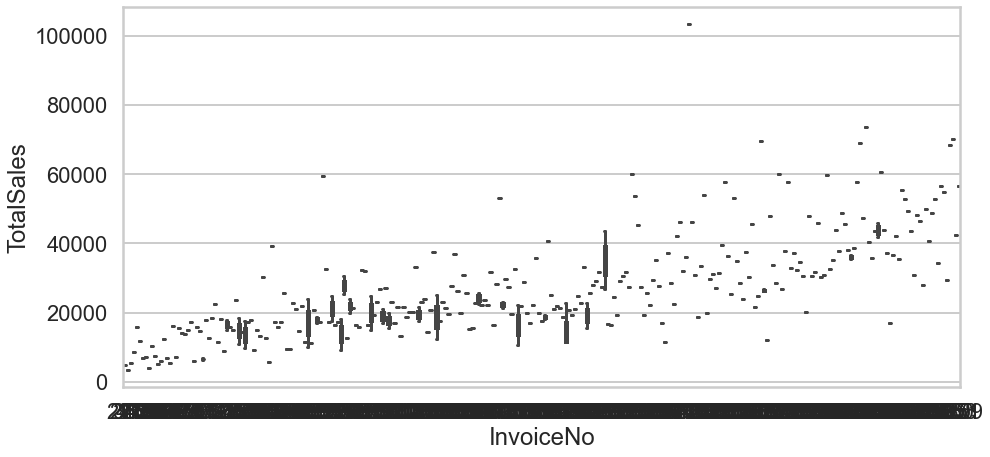

In [291]:
sns.boxplot(x='InvoiceNo', y='TotalSales', data=df5)

Text(0, 0.5, 'Proportion of Variance Explained')

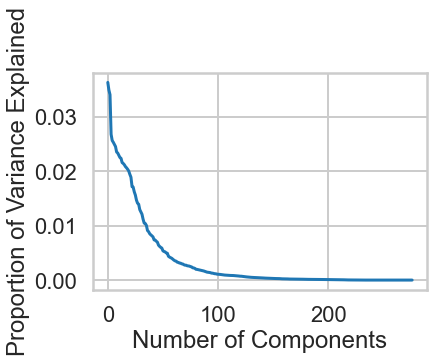

In [200]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)

# Do the rest on your own :)
variance = pca.explained_variance_ratio_

# Plot() it 
plt.plot(range(len(variance)), variance)

# Label the axes
plt.xlabel("Number of Components")
plt.ylabel("Proportion of Variance Explained")

Time series

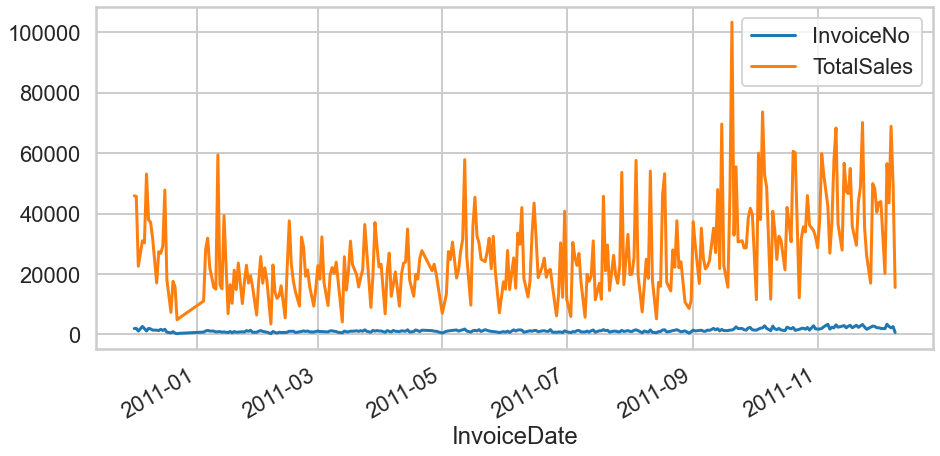

In [201]:
df5.columns=["InvoiceDate","InvoiceNo",'TotalSales']
df5.head()
df5.describe()
df5.set_index('InvoiceDate',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df5.plot()


In [292]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df5['TotalSales'])
print(test_result)

(-1.2435991215409412, 0.6545650745327524, 12, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, 6223.542253885559)


In [293]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

#if result.loc['p-value'] <= 0.05:
    #print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
#else:
    #print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df5['TotalSales'])

ADF Test Statistic : -1.2435991215409412
p-value : 0.6545650745327524
#Lags Used : 12
Number of Observations : 292


In [294]:
df5['Sales First Difference'] = df5['TotalSales'] - df5['TotalSales'].shift(1)
df5['Seasonal First Difference']=df5['TotalSales']-df5['TotalSales'].shift(12)
df5.head()

,InvoiceNo,TotalSales,Sales First Difference,Seasonal First Difference
InvoiceDate,,,,
2010-12-01,1924,45867.26,NaN,NaN
2010-12-02,2003,45656.47,-210.79,NaN
2010-12-03,1100,22553.38,-23103.09,NaN
2010-12-05,2618,30970.28,8416.90,NaN
2010-12-06,1926,30258.77,-711.51,NaN


In [295]:
adfuller_test(df5['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.423459286693054
p-value : 0.0002697064910178956
#Lags Used : 15
Number of Observations : 277


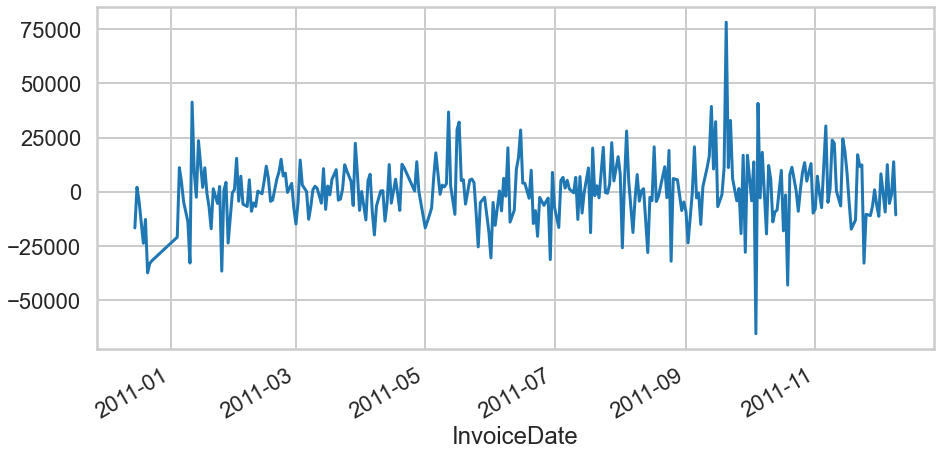

In [296]:
df5['Seasonal First Difference'].plot()

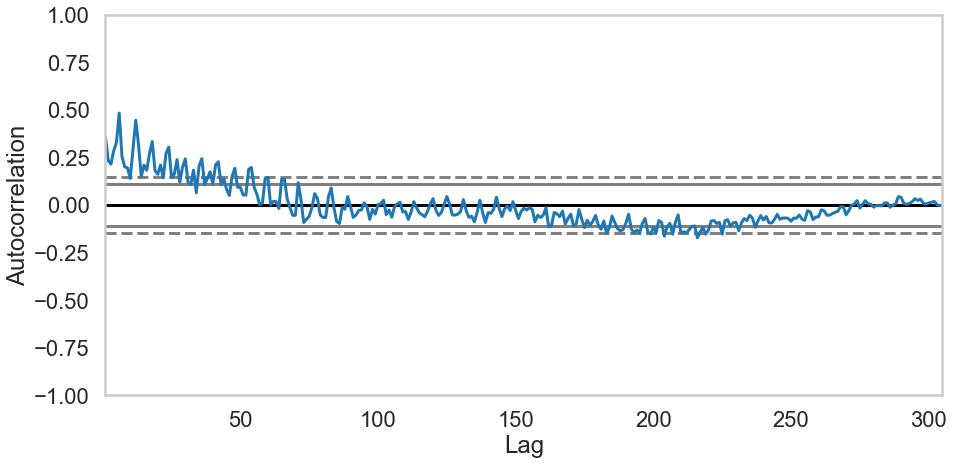

In [297]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df5['TotalSales'])
plt.show()

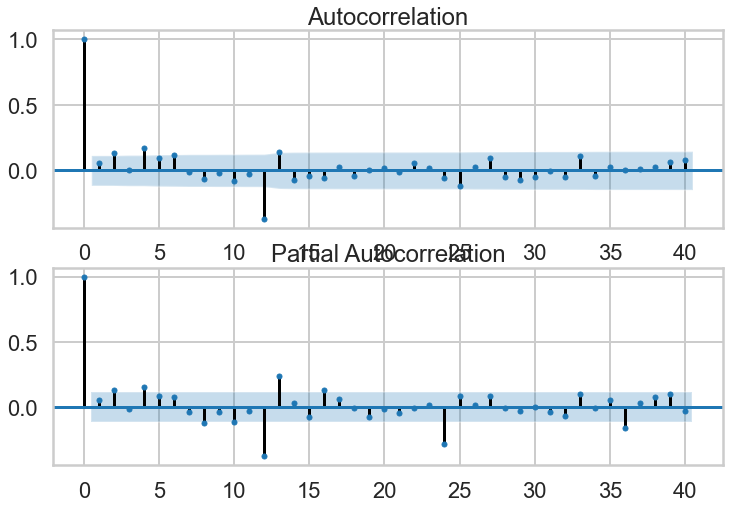

In [298]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df5['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [299]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df5['TotalSales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.TotalSales   No. Observations:                  304
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3304.321
Method:                       css-mle   S.D. of innovations          12676.673
Date:                Tue, 16 Feb 2021   AIC                           6616.643
Time:                        21:57:42   BIC                           6631.511
Sample:                             1   HQIC                          6622.590
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 45.8712     59.331      0.773      0.439     -70.415     162.157
ar.L1.D.TotalSales     0.0859      0.063      1.366      0.172      -0.037       0.209
ma.L1.D.TotalSales    -0.9296      0.024    -38.218      0.000      -0.977      -0.882
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           11.6351           +0.0000j           11.6351            0.0000
MA.1            1.0758           +0.0000j            1.0758            0.0000
-----------------------------------------------------------------------------
"""

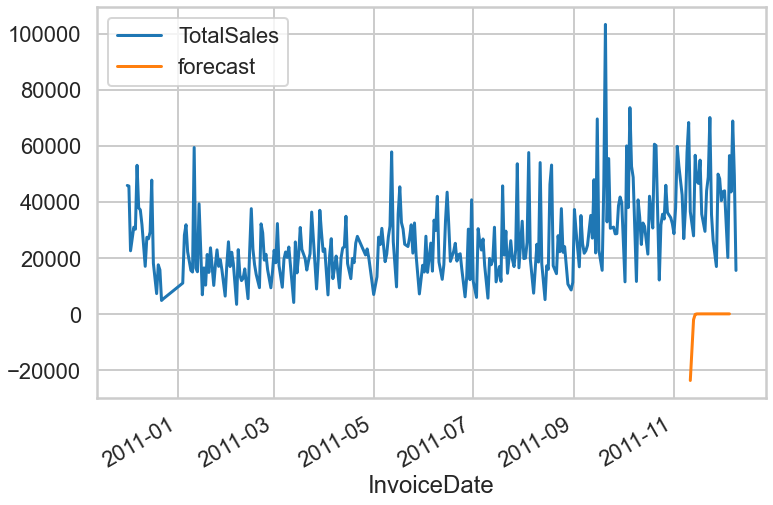

In [300]:
df5['forecast']=model_fit.predict(start=280,end=300,dynamic=True)
df5[['TotalSales','forecast']].plot(figsize=(12,8))

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


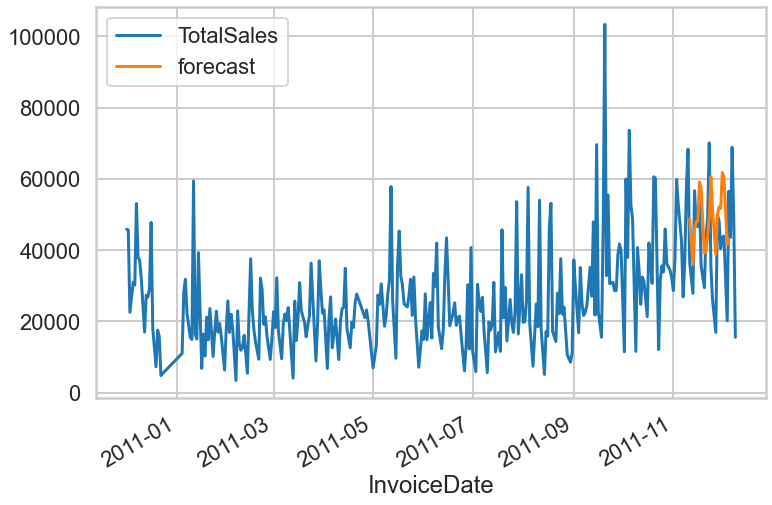

In [302]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df5['TotalSales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df5['forecast']=results.predict(start=280,end=300,dynamic=True)
df5[['TotalSales','forecast']].plot(figsize=(12,8))

In [212]:
results.predict(start=345,end=372,dynamic=True)

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2012: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


345    54817.819532
346    51226.530880
347    33051.518019
348    44592.938378
349    45091.520746
350    55819.736303
351    53443.773376
352    38125.866789
353    31221.081194
354    50507.471927
355    50200.520441
356    47891.215211
357    55967.966806
358    52376.523902
359    34201.732092
360    45742.173103
361    46241.287562
362    56968.926498
363    54593.641847
364    39276.464379
365    32371.046461
366    51657.346397
367    51350.395736
368    49041.107897
369    57117.875075
370    53526.419682
371    35351.645769
372    46892.007487
dtype: float64

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


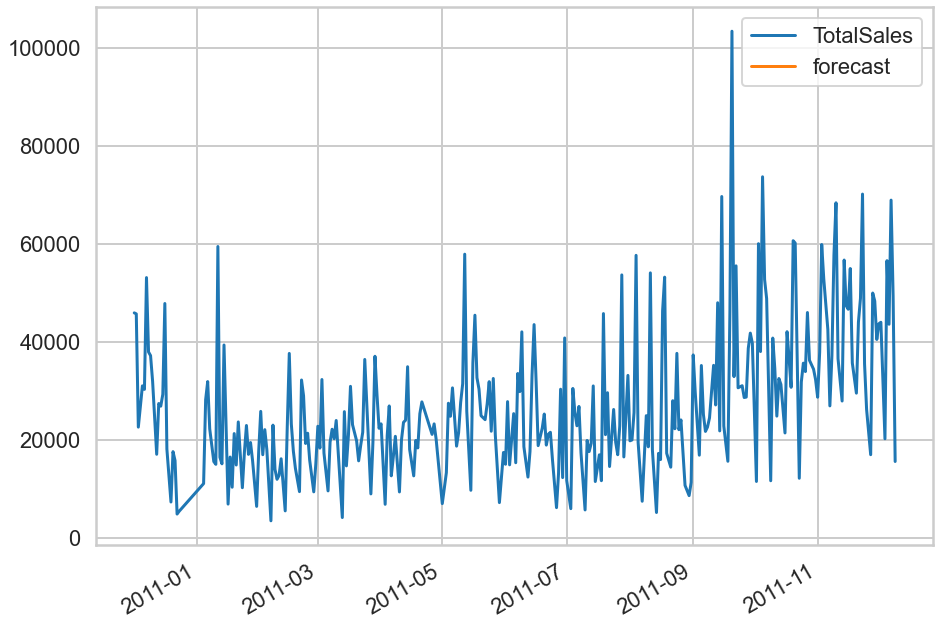

In [304]:
from pandas.tseries.offsets import DateOffset
future_dates=[df5.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df5.columns)

future_datest_df.tail()

future_df=pd.concat([df5,future_datest_df])

future_df['forecast'] = results.predict(start = 280, end = 320, dynamic= True)
future_df[['TotalSales', 'forecast']].plot(figsize=(15, 11))

In [306]:
results.predict(start = 2011-11-31, end = 2012-1-25, dynamic= True)

C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\batka\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2012: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


1969    200326.163466
1970    211053.751602
1971    208678.526706
1972    193361.413473
1973    186455.939848
1974    205742.231785
1975    205435.281196
1976    203125.994890
1977    211202.763441
1978    207611.306947
1979    189436.534611
1980    200976.889343
1981    201476.050679
1982    212203.638815
1983    209828.413919
1984    194511.300686
1985    187605.827061
1986    206892.118998
dtype: float64